In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [17]:
N = 1000
rng = np.random.default_rng()
X = rng.uniform(low=-3.0, high=3.0, size=(N,2))
Y = np.cos(2*X[:,0]) + np.sin(3*X[:,1])

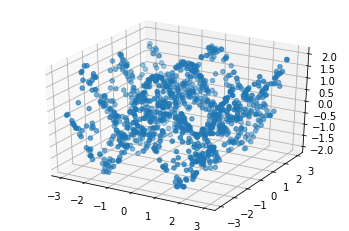

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [45]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='mse',
              metrics=['accuracy'])

history = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0009 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8986 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9030 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8703 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8061 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7547 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6571 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5040 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss:

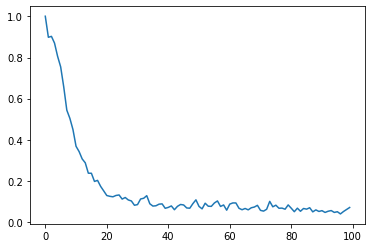

In [49]:
plt.plot(history.history['loss'], label='loss');

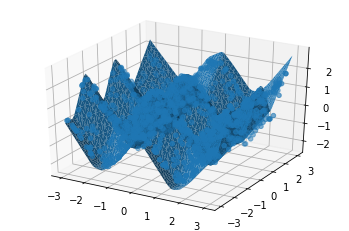

In [47]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

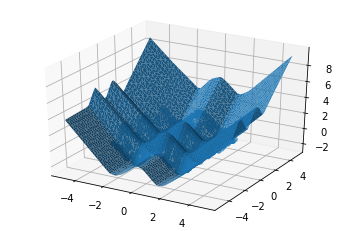

In [48]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()